In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [3]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [4]:
df=pd.DataFrame(df)

In [5]:
df.head(15)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [6]:
df.tail(15)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
190,191,3,vw rabbit,gas,std,two,hatchback,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,9980.0
191,192,0,volkswagen rabbit,gas,std,four,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,24,13295.0
192,193,0,volkswagen rabbit custom,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845.0
193,194,0,volkswagen dasher,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290.0
194,195,-2,volvo 145e (sw),gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940.0
195,196,-1,volvo 144ea,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415.0
196,197,-2,volvo 244dl,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0
197,198,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0
198,199,-2,volvo 264gl,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0
199,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
df.isnull()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(205, 26)

In [13]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [14]:
numerical_columns=df.select_dtypes('number')

In [15]:
numerical_columns

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


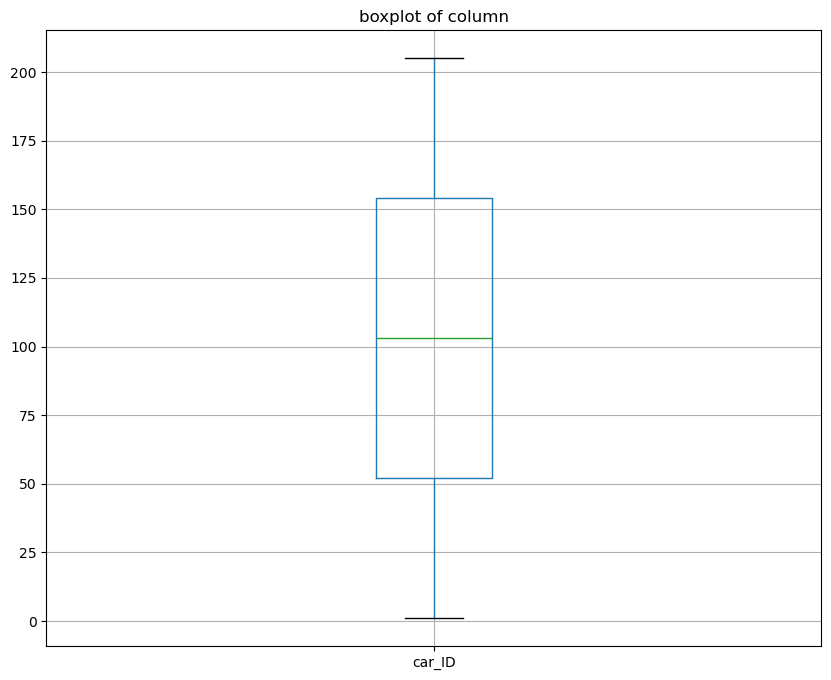

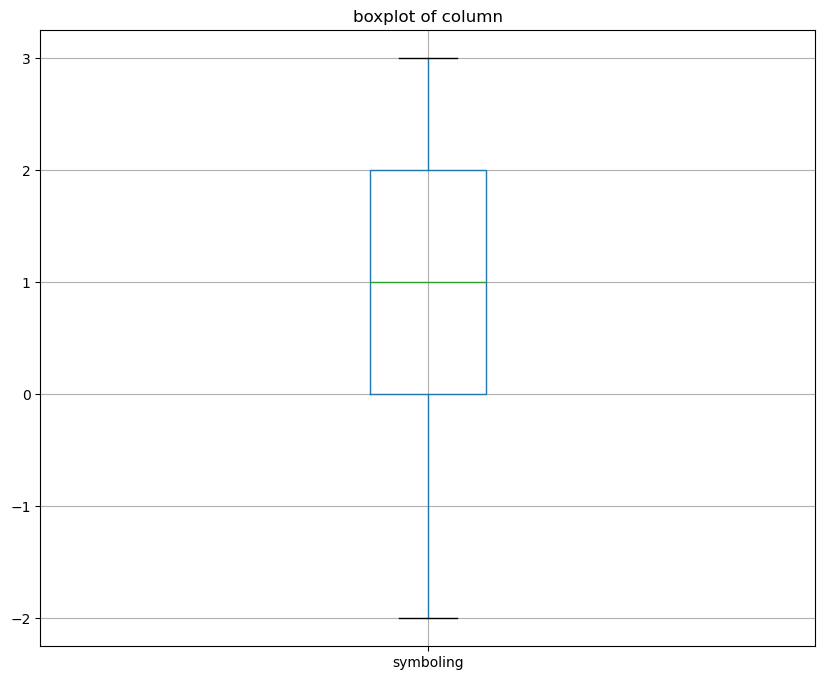

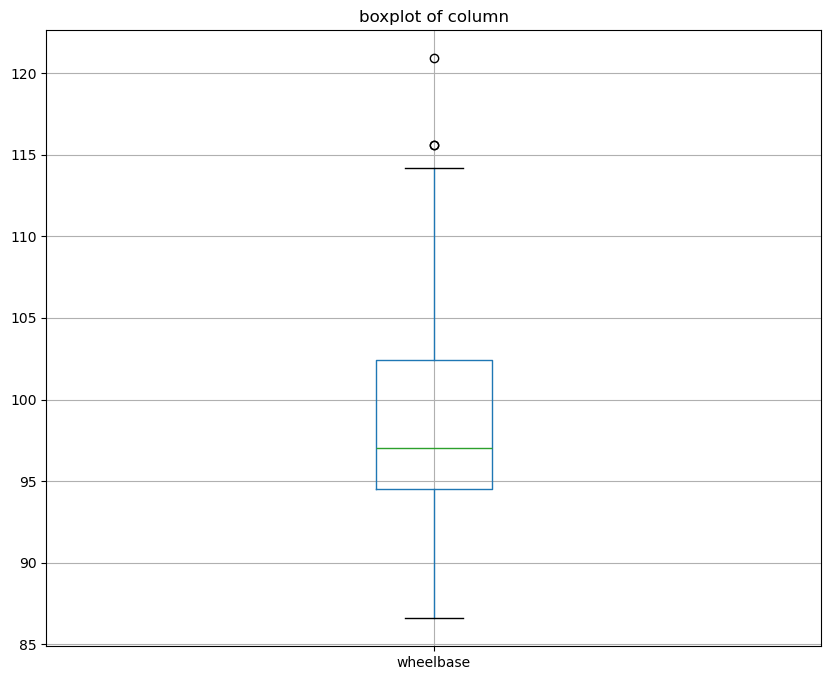

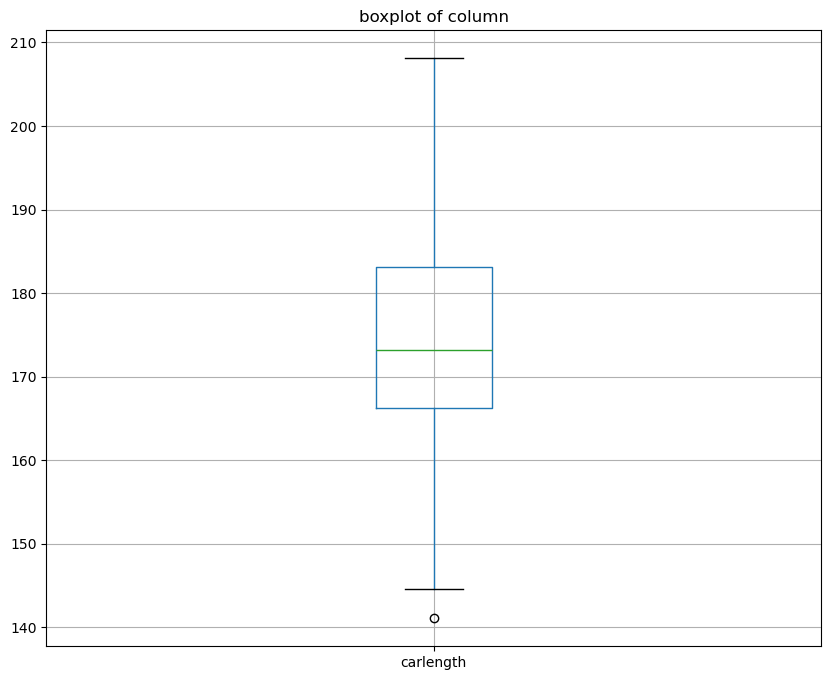

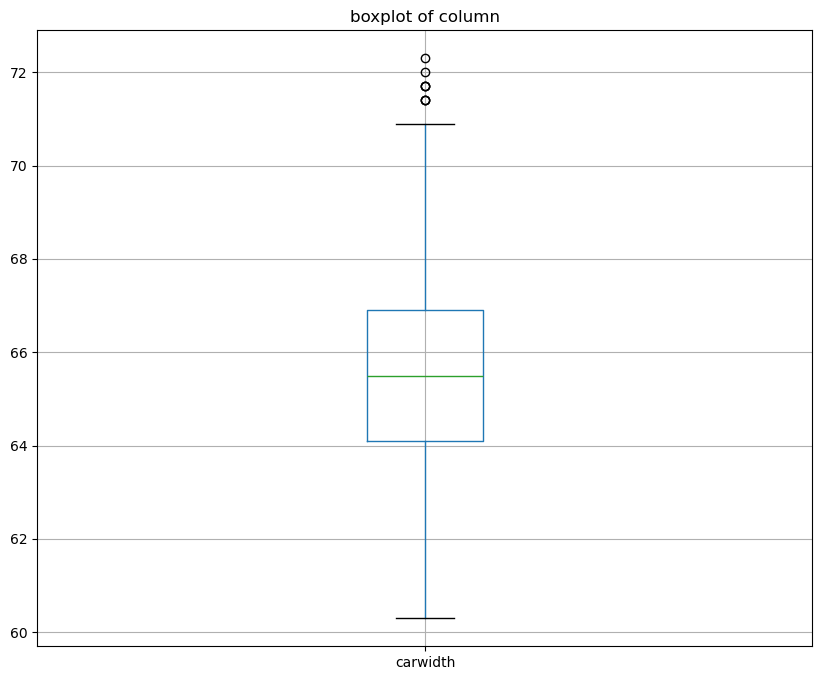

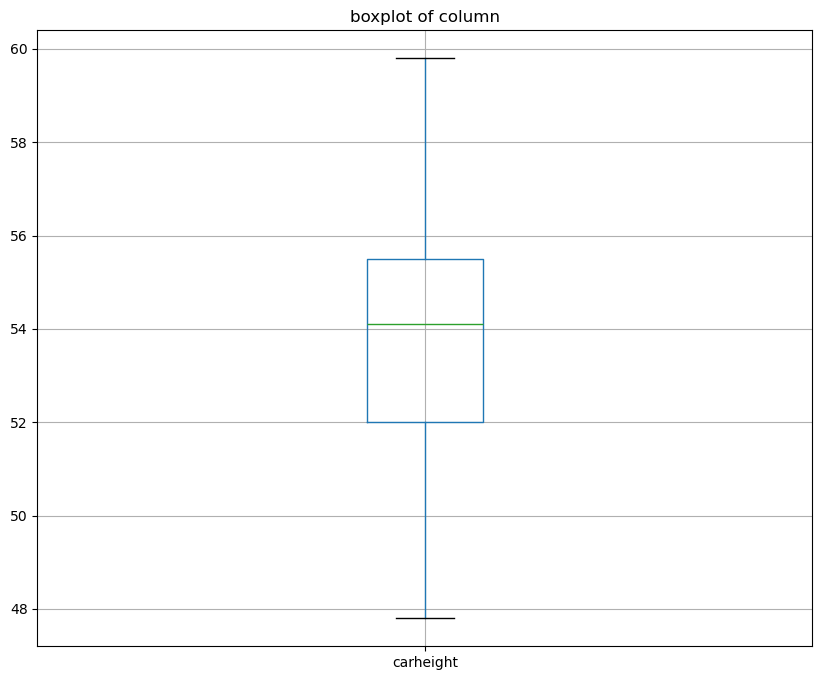

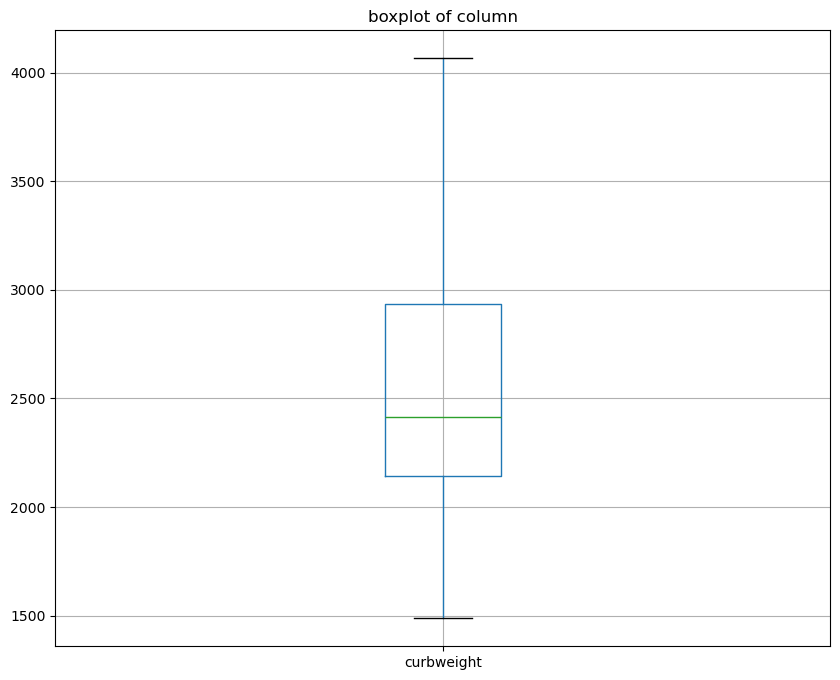

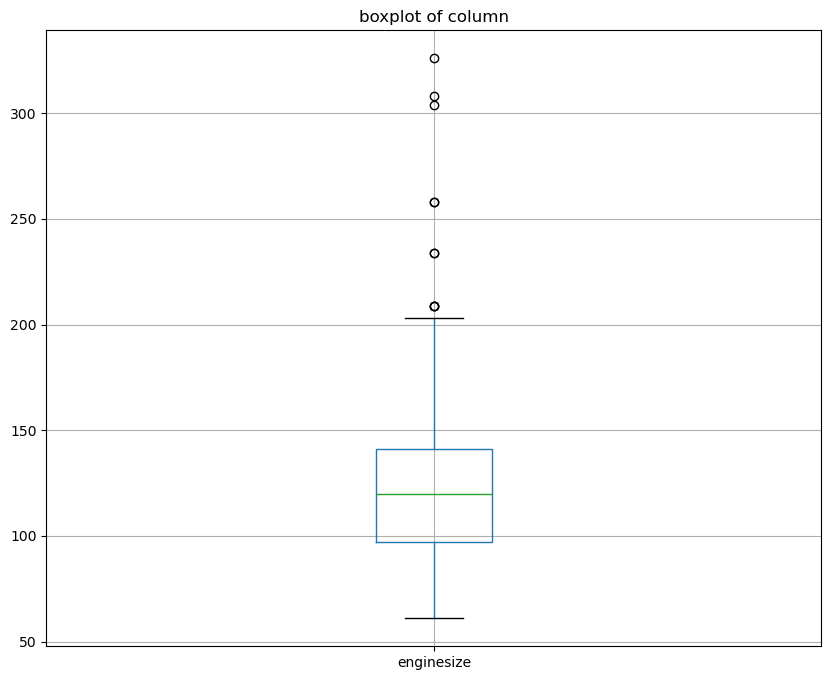

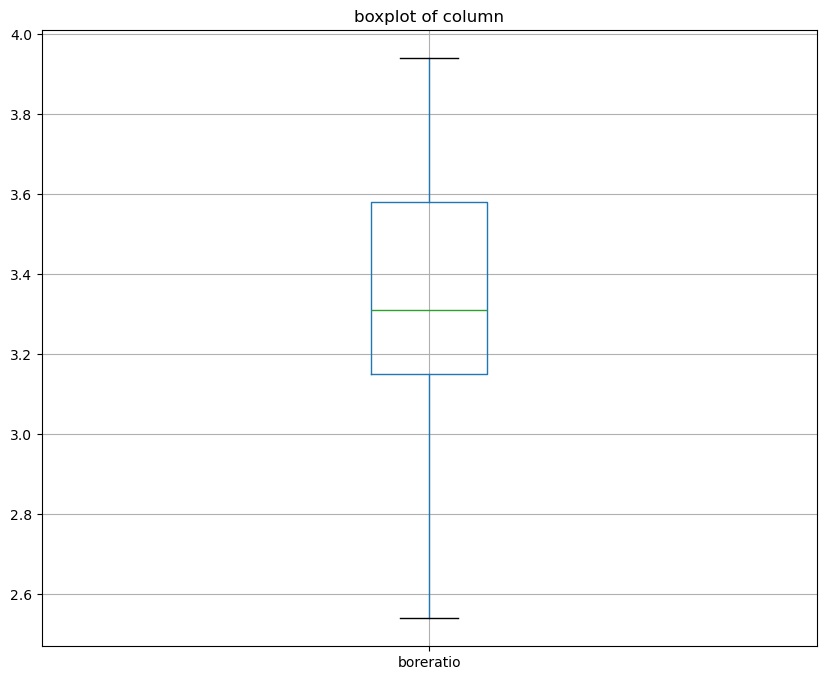

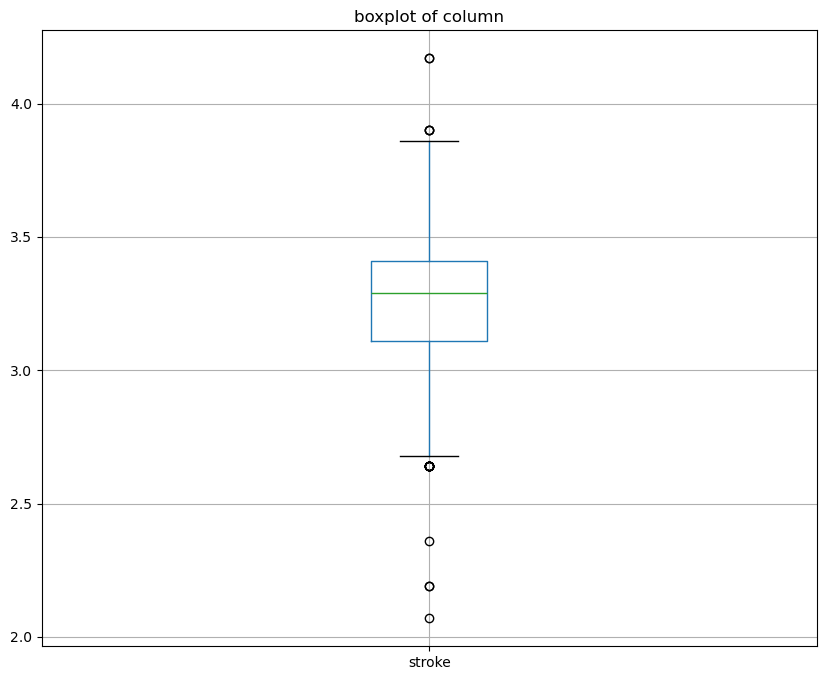

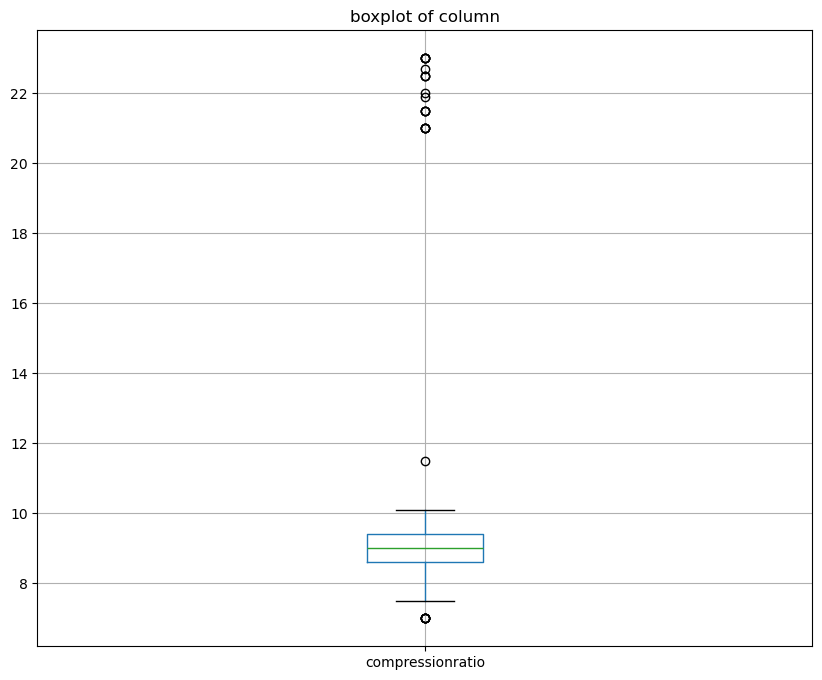

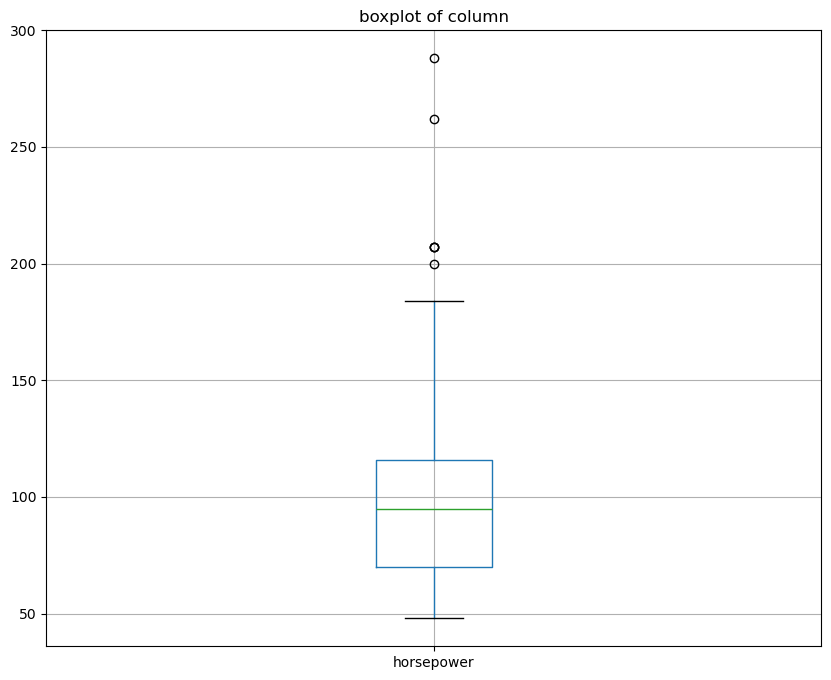

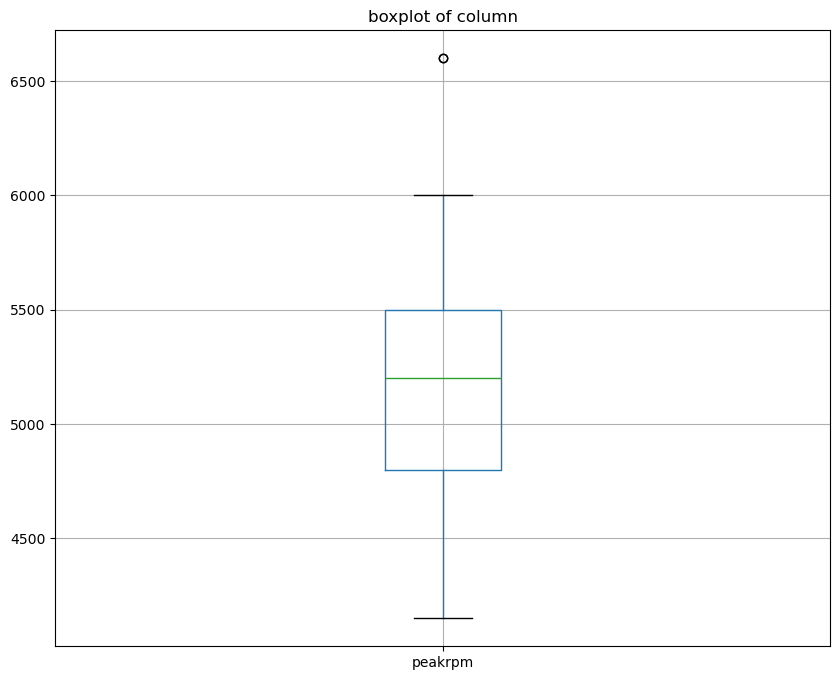

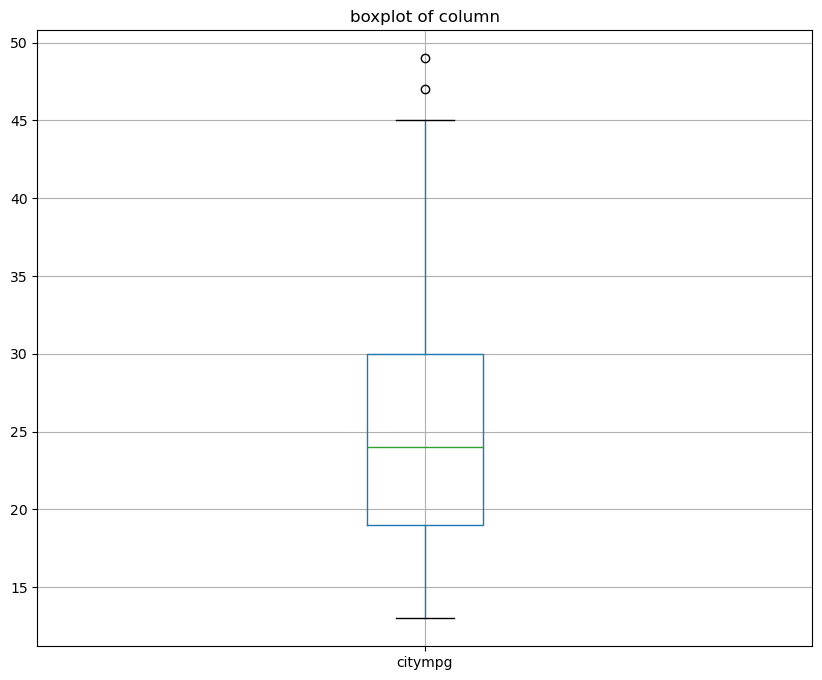

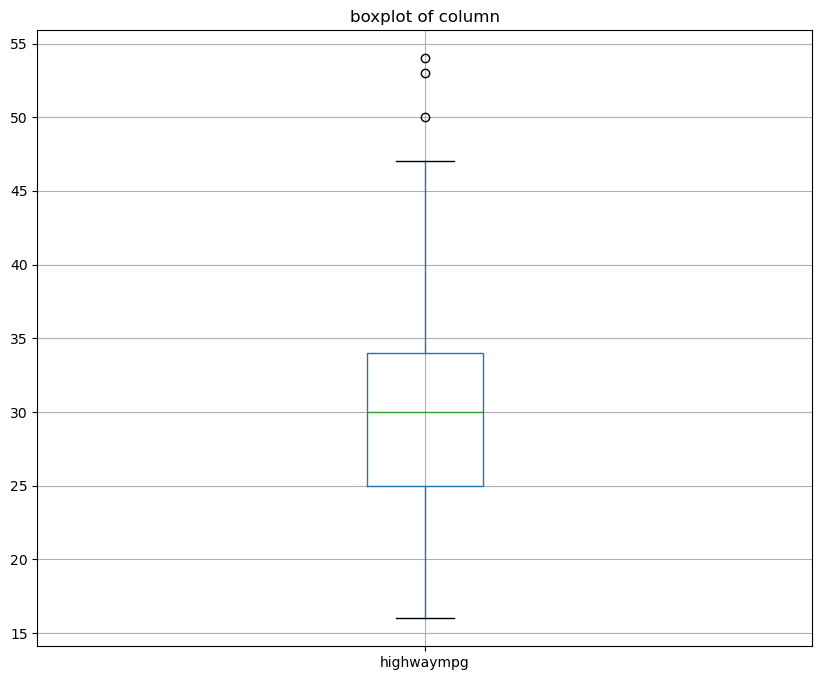

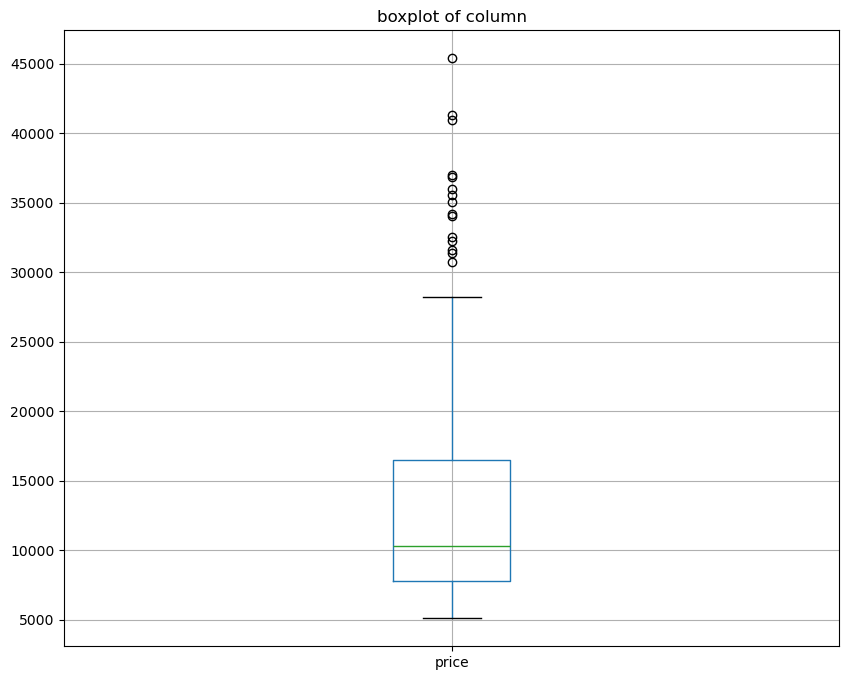

In [16]:
for column in numerical_columns:
    plt.figure(figsize=(10,8))
    numerical_columns.boxplot(column=column)
    plt.title(f'boxplot of {'column'}')

In [17]:
def Handling_Outliers(df):
    for col in df.select_dtypes(include = ['int64','float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_bound = Q1 - (1.5 * IQR)
        Upper_bound = Q3 + (1.5 * IQR)

        #CAPPING OUTLIERS
        df[col]= df[col].apply(lambda x: Lower_bound if x < Lower_bound else Upper_bound if x > Upper_bound else x)

    return df

In [18]:
df1=Handling_Outliers(df)
df1

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173.0,mpfi,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145.0,idi,3.01,3.40,10.6,106.0,4800.0,26.0,27.0,22470.0


<Axes: >

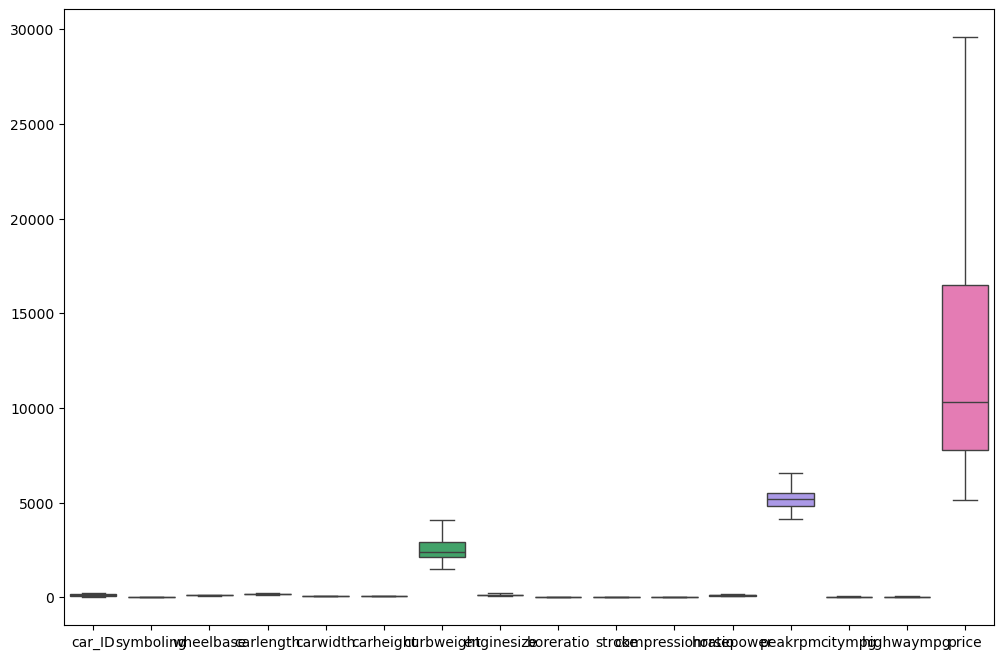

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(df1)

In [20]:
pt=PowerTransformer(method='yeo-johnson')

In [21]:
numerical_features=df1.select_dtypes(include=['int64','float64']).columns


In [22]:
df1[numerical_features]=pt.fit_transform(df1[numerical_features])

In [23]:
df1[numerical_features].skew()

car_ID             -0.268636
symboling          -0.064508
wheelbase           0.003159
carlength          -0.000424
carwidth            0.000000
carheight          -0.002653
curbweight          0.024871
enginesize          0.021314
boreratio          -0.011526
stroke              0.011287
compressionratio    0.001809
horsepower          0.044124
peakrpm            -0.002338
citympg             0.000325
highwaympg         -0.006936
price               0.081616
dtype: float64

In [24]:
df2=df1[numerical_features]

In [25]:
correlation=df2.corr()
correlation

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.168789,0.174528,0.171698,0.102707,0.249374,0.122208,0.071438,0.267838,-0.145482,0.158270,-0.018831,-0.214406,0.063926,0.047925,-0.015721
symboling,-0.168789,1.000000,-0.561041,-0.373738,-0.244950,-0.542977,-0.235214,-0.164886,-0.157331,0.008447,-0.064772,0.005957,0.272725,-0.028024,0.052766,-0.122447
wheelbase,0.174528,-0.561041,1.000000,0.864441,0.770991,0.601500,0.735608,0.557667,0.473830,0.204289,-0.007564,0.433433,-0.352138,-0.460284,-0.529014,0.605542
carlength,0.171698,-0.373738,0.864441,1.000000,0.852265,0.484915,0.891362,0.739176,0.610873,0.161858,-0.067316,0.646672,-0.288063,-0.673999,-0.709843,0.789525
carwidth,0.102707,-0.244950,0.770991,0.852265,1.000000,0.273349,0.864943,0.749602,0.582289,0.228472,-0.055679,0.688921,-0.221294,-0.684738,-0.707066,0.803673
carheight,0.249374,-0.542977,0.601500,0.484915,0.273349,1.000000,0.297671,0.164429,0.169166,-0.037050,0.124442,-0.042055,-0.322103,-0.018681,-0.095025,0.182069
curbweight,0.122208,-0.235214,0.735608,0.891362,0.864943,0.297671,1.000000,0.859594,0.678555,0.185330,-0.129111,0.805330,-0.251763,-0.811271,-0.835081,0.903951
enginesize,0.071438,-0.164886,0.557667,0.739176,0.749602,0.164429,0.859594,1.000000,0.657967,0.254338,-0.142806,0.796293,-0.287057,-0.694313,-0.697213,0.808631
boreratio,0.267838,-0.157331,0.473830,0.610873,0.582289,0.169166,0.678555,0.657967,1.000000,-0.057905,-0.110743,0.614232,-0.257226,-0.578771,-0.583135,0.620367
stroke,-0.145482,0.008447,0.204289,0.161858,0.228472,-0.037050,0.185330,0.254338,-0.057905,1.000000,-0.068067,0.144645,-0.096278,-0.059407,-0.068298,0.126169


Text(0.5, 1.0, 'Correlation of Car price ')

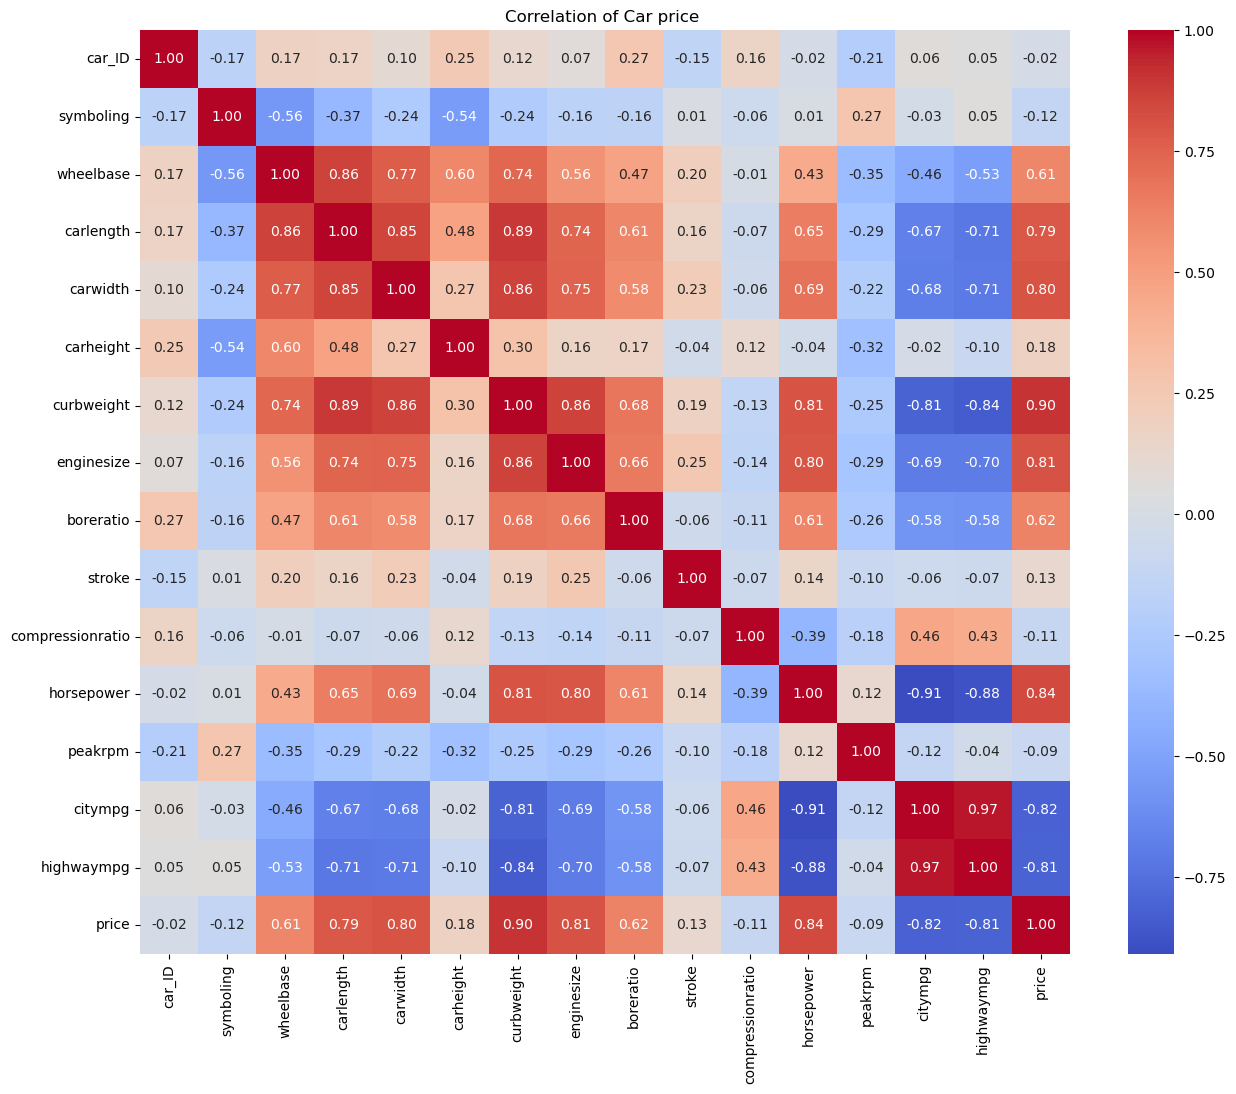

In [26]:
plt.figure(figsize=(15,12))
sns.heatmap(correlation,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation of Car price ')

In [27]:
x=df1.drop(columns=['price'])
y=df1['price']

In [28]:
sk=SelectKBest(score_func=f_regression,k=10)
x_num = sk.fit_transform(x.select_dtypes(include=['float64', 'int64']), y)


In [29]:
selected_features = x.select_dtypes(include=['float64', 'int64']).columns[sk.get_support()]
print(f'Selected Numerical Features:\n{selected_features}\n')


Selected Numerical Features:
Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg'],
      dtype='object')



In [30]:
feature_scores = pd.DataFrame({'Feature': x.select_dtypes(include=['float','int64']).columns, 'Score': sk.scores_}).sort_values(by='Score', ascending=False)
print("\nFeature Scores:")
print(feature_scores)


Feature Scores:
             Feature       Score
6         curbweight  907.059525
11        horsepower  495.002063
13           citympg  412.239958
7         enginesize  383.508860
14        highwaympg  382.900254
4           carwidth  370.267877
3          carlength  335.961288
8          boreratio  127.003580
2          wheelbase  117.533665
5          carheight    6.959996
9             stroke    3.283776
1          symboling    3.089960
10  compressionratio    2.285581
12           peakrpm    1.672592
0             car_ID    0.050186


In [31]:
x_selected=x[selected_features]

In [32]:
x_selected.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg'],
      dtype='object')

In [33]:
scaler=StandardScaler()

In [34]:
x_scaled=scaler.fit_transform(x_selected)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)


In [36]:
print(f"""
x train shape : {x_train.shape}
x test shape : {x_test.shape} 
Y train shape : {y_train.shape}
y test shape : {y_test.shape}
""")


x train shape : (164, 10)
x test shape : (41, 10) 
Y train shape : (164,)
y test shape : (41,)



In [37]:
models={
    '1.linear regression':LinearRegression(),
    '2.decision tree regressor':DecisionTreeRegressor(),
    '3.random forest regressor':RandomForestRegressor(),
    '4.gradient boosting regressor':GradientBoostingRegressor(),
    '5.svr':SVR()
}

In [38]:
result={}
for model_name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test,y_pred)
    result[model_name]={'mae':mae,'mse':mse,'rmse':rmse,'r2':r2}

In [39]:
result_df=pd.DataFrame(result).T
print(result_df)

                                    mae       mse      rmse        r2
1.linear regression            0.298748  0.150458  0.387889  0.845643
2.decision tree regressor      0.201260  0.064131  0.253241  0.934207
3.random forest regressor      0.198381  0.062137  0.249274  0.936252
4.gradient boosting regressor  0.209756  0.068736  0.262175  0.929482
5.svr                          0.350224  0.242047  0.491983  0.751679


In [40]:
rfg = RandomForestRegressor(
    random_state=42,
    n_estimators=50,         
    max_depth=10,             
    min_samples_split=5,      
    min_samples_leaf=2,       
    max_features='sqrt',      
    n_jobs=-1                
)

In [41]:
param_grid = {
    'n_estimators': [50, 100, 200,300],  
    'max_depth': [10, 20, None],     
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]   
}

In [42]:
grid_search = GridSearchCV(
    estimator=rfg,
    param_grid=param_grid,
    cv=10,  
    scoring='r2',  
    n_jobs=-1, 
    verbose=2   
)

In [ ]:
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)